# Project: Wrangling and Analyze Data


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Data Gathering</a></li>
<li><a href="#assessing">Data Assessing</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#visualisation">Data Visualisation</a></li>
</ul>

<a id='intro'></a>
## Introduction
> WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog based on the images and breed of the dog as presented on the twitter account.
> These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc.
> But thanks to Udacity, they have performed some neutral network procedures to classify the dogs based on their images which are shared with the tweets.

<a id='gathering'></a>
## Step 1: Data Gathering
> In this step, I first gather the data from the different sources and since I couldn't obtain authorization to use Twitter API, The twitter-archive-enhanced.csv data is loaded from the computer storage and the image-predictions data is downloaded from this URL "http://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv" <br>

> Data to be used for the project:<br>
> 1. Twitter archive data (.csv)
> 2. Twitter image predictions data (.tsv)
> 3. Tweet count data (.txt)

In [1]:
# Import Packages to be used in the project
import pandas as pd
import numpy as np
import json
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [2]:
# Read the 'twitter-archive-enhanced.csv' data and view the data to confirm it has been read.
twitter_data = pd.read_csv('C:/Users/tturyarugayo/Downloads/twitter-archive-enhanced.csv')
twitter_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# Read the 'image-predictions.tsv' data and view the data to confirm it has been read.
#URL downloaded programatically 
url = "http://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read TSV file
image_data = pd.read_csv('image-predictions.tsv', sep='\t' )

In [4]:
image_data.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
!pip install tweepy

ERROR: Could not find a version that satisfies the requirement tweepy (from versions: none)
ERROR: No matching distribution found for tweepy


In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [5]:
# since the tweet-json.txt data has been downloaded and stored on the computer 
# Open the tweet-json.txt data as a file and read this .txt file line by line into a pandas DataFrame with
# tweet ID, retweet count, and favorite count
df_list = []
with open('C:/Users/tturyarugayo/Documents/tweet-json.txt') as file:
    for line in file:
        data = json.loads(line)
        keys = data.keys()
        user = data.get('user')
        id_str = data.get('id_str')
        retweet_count = data.get('retweet_count')
        favorite_count = data.get('favorite_count')
        df_list.append({'tweet_id': id_str,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})

In [6]:
#Having read the tweet count data, I read the dataframe and view it to confirm it has been read.
tweet_count = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
tweet_count.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


<a id='assessing'></a>
## Step 2: Data Assessing
> Having gathered all the three datasets, I have to assess them visually and programatically for tidiness and quality issues.

> #### Assess twitter-archive-enhanced.csv

In [7]:
# Open a sample of the twitter archive data to visually assess it and look for the issues.
pd.set_option('display.max_colwidth', -1)
twitter_data.sample(40)

C:\Users\tturyarugayo\AppData\Local\Temp\ipykernel_1672\1025554031.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1724,680085611152338944,NaN,NaN,2015-12-24 18:00:19 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is by far the most coordinated series of pictures I was sent. Downright impressive in every way. 12/10 for all https://t.co/etzLo3sdZE,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/680085611152338944/photo/1,https://twitter.com/dog_rates/status/680085611152338944/photo/1,https://twitter.com/dog_rates/status/680085611152338944/photo/1",12,10,by,None,None,None,None
257,843856843873095681,NaN,NaN,2017-03-20 16:08:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Sadie and Daisy. They do all their shopping together. Can never agree on what to get. Like an old married pupple. Both 12/10 https://t.co/f5C5l5wa0e,NaN,NaN,NaN,https://twitter.com/dog_rates/status/843856843873095681/photo/1,12,10,Sadie,None,None,None,None
1037,744709971296780288,NaN,NaN,2016-06-20 01:54:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Harvey. He's stealthy af. 10/10 would do my best to pet https://t.co/zAzaRT6NnT,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744709971296780288/photo/1,10,10,Harvey,None,None,None,None
71,878776093423087618,NaN,NaN,2017-06-25 00:45:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Snoopy. He's a proud #PrideMonthPuppo. Impeccable handwriting for not having thumbs. 13/10 would love back #PrideMonth https://t.co/lNZwgNO4gS,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/878776093423087618/photo/1,https://twitter.com/dog_rates/status/878776093423087618/photo/1",13,10,Snoopy,None,None,None,puppo
1537,689877686181715968,NaN,NaN,2016-01-20 18:30:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Durg. He's trying to conquer his fear of trampolines. 9/10 it's not working https://t.co/5iH08ltkoe,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689877686181715968/photo/1,9,10,Durg,None,None,None,None
2144,669942763794931712,NaN,NaN,2015-11-26 18:16:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Andru. He made his very own lacrosse stick. Much dedication. Big dreams. Tongue slip. 11/10 go get em Andru https://t.co/1VJoY3OJ1F,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669942763794931712/photo/1,11,10,Andru,None,None,None,None
883,760252756032651264,NaN,NaN,2016-08-01 23:15:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Fido. He can tell the weather. Not good at fetch tho. Never comes when called. 4/10 would probably still pet https://t.co/4gOv2Q3iKP,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760252756032651264/photo/1,4,10,Fido,None,None,None,None
794,773336787167145985,NaN,NaN,2016-09-07 01:47:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Fizz. She thinks love is a social construct consisting solely of ideals perpetuated by mass media 11/10 woke af https:/…,7.713808e+17,4.196984e+09,2016-09-01 16:14:48 +0000,"https://twitter.com/dog_rates/status/771380798096281600/photo/1,https://twitter.com/dog_rates/status/771380798096281600/photo/1,https://twitter.com/dog_rates/status/771380798096281600/photo/1,https://twitter.com/dog_rates/status/771380798096281600/photo/1",11,10,Fizz,None,None,None,None
2205,668633411083464705,NaN,NaN,2015-11-23 03:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Churlie. He likes bagels. 10/10 https://t.co/k8P6FZlzAG,NaN,NaN,NaN,"https://twitter.

In [8]:
# Obtain descriptive parameters of each variable in the twitter archive data to programatically assess the data.
twitter_data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
# Obatin information of each variable to attian columns with missing data and inconsistencies.
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
# Find out whether the tweet_id is unique for each entry. 
twitter_data.tweet_id.nunique()

2356

In [11]:
# Find out the different names of the dogs
twitter_data.name.value_counts().head(60)

None        745
a           55 
Charlie     12 
Cooper      11 
Lucy        11 
Oliver      11 
Tucker      10 
Penny       10 
Lola        10 
Winston     9  
Bo          9  
Sadie       8  
the         8  
Daisy       7  
Buddy       7  
Toby        7  
an          7  
Bailey      7  
Leo         6  
Oscar       6  
Stanley     6  
Rusty       6  
Bella       6  
Dave        6  
Jack        6  
Koda        6  
Scout       6  
Jax         6  
Milo        6  
Louis       5  
Phil        5  
Sammy       5  
Gus         5  
Chester     5  
Alfie       5  
Sunny       5  
Bentley     5  
very        5  
Oakley      5  
Finn        5  
George      5  
Larry       5  
Clarence    4  
Loki        4  
Walter      4  
Reggie      4  
Hank        4  
Scooter     4  
Duke        4  
quite       4  
Reginald    4  
Maggie      4  
Luna        4  
Maddie      4  
Dexter      4  
Jerry       4  
Carl        4  
Ruby        4  
Riley       4  
Clark       4  
Name: name, dtype: int64

In [12]:
# Find out whether the name of each dog is unique and how many share the same name.
print(twitter_data.name.nunique())
print(twitter_data.name.value_counts())

957
None          745
a             55 
Charlie       12 
Cooper        11 
Lucy          11 
              .. 
Dex           1  
Ace           1  
Tayzie        1  
Grizzie       1  
Christoper    1  
Name: name, Length: 957, dtype: int64


In [13]:
twitter_data.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
2       9  
1       9  
75      2  
15      2  
420     2  
0       2  
80      1  
144     1  
17      1  
26      1  
20      1  
121     1  
143     1  
44      1  
60      1  
45      1  
50      1  
99      1  
204     1  
1776    1  
165     1  
666     1  
27      1  
182     1  
24      1  
960     1  
84      1  
88      1  
Name: rating_numerator, dtype: int64

> #### Assess image-predictions.tsv data

In [14]:
# Open a sample of the image data to visually assess it and look for the issues.
image_data.sample(40)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1350,759793422261743616,https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg,2,golden_retriever,0.985876,True,Labrador_retriever,0.001948,True,kuvasz,0.001752,True
1544,791672322847637504,https://pbs.twimg.com/media/CvyVxQRWEAAdSZS.jpg,1,golden_retriever,0.705092,True,Labrador_retriever,0.219721,True,kuvasz,0.015965,True
530,676819651066732545,https://pbs.twimg.com/media/CWSL4W8WsAAE4KU.jpg,2,rain_barrel,0.625555,False,barrel,0.138383,False,Labrador_retriever,0.039465,True
1111,724046343203856385,https://pbs.twimg.com/media/CgxUTS_XEAAC0pv.jpg,1,boxer,0.826272,True,bull_mastiff,0.158595,True,Great_Dane,0.011859,True
1016,709901256215666688,https://pbs.twimg.com/media/CdoTbL_XIAAitq2.jpg,2,bib,0.998814,False,handkerchief,0.000512,False,umbrella,0.000224,False
27,666396247373291520,https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg,1,Chihuahua,0.978108,True,toy_terrier,0.009397,True,papillon,0.004577,True
1693,816014286006976512,https://pbs.twimg.com/media/CiibOMzUYAA9Mxz.jpg,1,English_setter,0.677408,True,Border_collie,0.052724,True,cocker_spaniel,0.048572,True
74,667393430834667520,https://pbs.twimg.com/media/CUMOyd3XIAAl13H.jpg,1,papillon,0.557009,True,Border_collie,0.271963,True,collie,0.073473,True
1536,790581949425475584,https://pbs.twimg.com/media/Cvi2FiKWgAAif1u.jpg,2,refrigerator,0.998886,False,malinois,0.000153,True,kelpie,0.000131,True
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False


In [15]:
# Obatin descriptive parameters for each column to progamatically assess the data.
image_data.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [16]:
# Obtain information of each cloumn to identify the missing data and other inconsistencies.
image_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
# Find out how many possible outcomes are there for p1
sum(image_data.jpg_url.duplicated())

66

In [18]:
# Find out how many possible outcomes are there for p2
image_data.p2.value_counts()

Labrador_retriever    104
golden_retriever      92 
Cardigan              73 
Chihuahua             44 
Pomeranian            42 
                      .. 
medicine_chest        1  
quail                 1  
horse_cart            1  
waffle_iron           1  
bagel                 1  
Name: p2, Length: 405, dtype: int64

In [19]:
# Find out how many possible outcomes are there for p3
image_data.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                    1 
assault_rifle         1 
axolotl               1 
pot                   1 
banana                1 
Name: p3, Length: 408, dtype: int64

In [20]:
# Fid out how many tweet_ids are unique and not repeated.
image_data.tweet_id.nunique()

2075

>#### Assessing tweet count data

In [21]:
# Open a sample of the tweet_count data to visually assess it and look for the issues.
tweet_count.sample(50)

,tweet_id,retweet_count,favorite_count
2028,671789708968640512,3811,7527
2314,666649482315059201,608,923
63,879674319642796034,10,315
1513,690989312272396288,3282,6513
637,793271401113350145,2763,9677
1158,724004602748780546,1790,4561
1348,704113298707505153,629,2031
1278,708834316713893888,571,1860
694,786709082849828864,7069,20296
1982,672902681409806336,550,1452


In [22]:
# Obtain the descriptive parameters of each column
tweet_count.describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


In [23]:
tweet_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


### Quality issues
#### Twitter-archive-enhanced data
> 1. Some tweets were retweeted so they have to be dropped since we want original tweets.
> 2. Some tweets have replies and since want original tweets, we have to drop these entries.
> 3. Some columns have little or no data for example;<br>
i).   in_reply_to_status_id <br>
ii).  in_reply_to_user_id <br>
iii). retweeted_status_user_id, among others <br>
> 4. Extract the essential details of the source column and drop the HTML tags attached to each entry.
> 5. Incorrect datatypes for timestamp, rating_numerator, rating_denominator,tweet_id and source.
> 6. There are 66 duplicated jpg_url in image data meaning these are similar pictures.
> 7. The 'name' column has entries classified as 'a' and other words that are clearly not names and all entries in the name column should begin with a capital letter.
> 8. Missing data in the expanded_urls column.

#### Image-predictions-data
> 9. Change the column headers in the image predictions data to be more descriptive.

### Tidiness issues
#### Twitter-archive-enhanced data
> 1. doggo, floofer, pupper and puppo should in one column.
> 2. All datasets should be merged into one dataset.

<a id='cleaning'></a>
## Step 3: Data Cleaning


#### Creating copies of the datasets.

In [24]:
# Creating copies of the datasets to be used for cleaning the data.
twitter_data_clean = twitter_data.copy()
image_data_clean = image_data.copy()
tweet_count_clean = tweet_count.copy()

#### Quality Issue 1

#### Define
Some tweets were retweeted and some have got replies so they have to be dropped since we want original tweets.

#### Code

In [25]:
# Code for deleting retweeted tweets
retweeted_columns = ['retweeted_status_id', 
                     'retweeted_status_user_id',
                     'retweeted_status_timestamp']
retweeted_mask = twitter_data_clean.retweeted_status_id.notnull()
twitter_data_clean = twitter_data_clean[~retweeted_mask]

#### Test

In [26]:
# Code to verify that all retweeted tweets are deleted
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

#### Quality Issue 2

#### Define
Some tweets have replies and since want original tweets, we have to drop these entries.

#### Code

In [27]:
# Code for deleting replied tweets
reply_columns = ['in_reply_to_status_id','in_reply_to_user_id']
reply_group = twitter_data_clean.in_reply_to_status_id.notnull()
twitter_data_clean = twitter_data_clean[~reply_group]

#### Test

In [28]:
# Code to verify that all replied tweets are deleted
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

#### Quality issue 3: 
#### Define
Some columns have little or no data for example in_reply_to status_id among others and should be deleted since they wont be required for analysis.

#### Code

In [29]:
# Code for deleting columns with little or no data
twitter_data_clean = twitter_data_clean.drop(columns=['in_reply_to_status_id','in_reply_to_user_id',
                                                      'retweeted_status_id' , 'retweeted_status_user_id' ,
                                                      'retweeted_status_timestamp'])

#### Test

In [30]:
twitter_data_clean.head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitt

In [31]:
# Code to verify that all retweeted tweets are deleted
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


#### Quality Issue 4:

#### Define

Extract the essential details of the source column and drop the HTML tags attached to each entry.

#### Code

In [32]:
# Code to capture the last anchor of the entry source as it is the essential part.
twitter_data_clean.source = twitter_data_clean.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')

C:\Users\tturyarugayo\AppData\Local\Temp\ipykernel_1672\2696000384.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  twitter_data_clean.source = twitter_data_clean.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')


#### Test

In [33]:
twitter_data_clean.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene    91  
Twitter Web Client     31  
TweetDeck              11  
Name: source, dtype: int64

#### Quality issue 5:

#### Define

Incorrect datatypes for timestamp, rating_numerator, rating_denominator,tweet_id and source.

#### Code

In [34]:
# Change the timestamp datatype to datetime
twitter_data_clean['timestamp'] =  pd.to_datetime(twitter_data_clean['timestamp'])

In [35]:
# code to change data type of rating numerator and rating denominator to float
twitter_data_clean[['rating_numerator', 'rating_denominator']] = twitter_data_clean[['rating_numerator',
                                                                                        'rating_denominator']].astype(float)

In [36]:
# Code to change the data type of tweet_id in all columns to string.
twitter_data_clean[['tweet_id']]= twitter_data_clean[['tweet_id']].astype(str)
image_data_clean[['tweet_id']]= image_data_clean[['tweet_id']].astype(str)
tweet_count_clean[['tweet_id']]= tweet_count_clean[['tweet_id']].astype(str)

In [37]:
# Code to change data type of source to category.
twitter_data_clean.source = twitter_data_clean.source.astype('category')

#### Test

In [38]:
# Visualise the data to see the changes that have been occured.
twitter_data_clean.head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12+00:00,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13.0,10.0,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40+00:00,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13.0,10.0,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51+00:00,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13.0,10.0,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14.0,10.0,Cassie,doggo,None,None,None


In [39]:
# Run the info command to test whether the datatype has changed.
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   category           
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   float64            
 6   rating_denominator  2097 non-null   float64            
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: category(1), datetime64[ns, UTC

#### Quality Issue 6:
#### Define
 There are 66 duplicated jpg_url in image data meaning these are similar pictures.

#### Code

In [40]:
# Code to delete the duplicated images and only keep one.
image_data_clean= image_data_clean.drop_duplicates(subset=['jpg_url'], keep='last')

#### Test

In [41]:
sum(image_data_clean.jpg_url.duplicated())

0

#### Test

#### Quality Issue 7:

#### Define 
The 'name' column has entries classified as 'a', 'an','the','very' and others which are unindentified names and should be treated as None.
The missing values in the name column should also be treated as None.

#### Code

In [42]:
# replace the unidenitified names and missing names into none
wrong_names = (["a", "all", "an", "by", "his", "just", "my", "not", "such", "the", "this", "very", "NaN"])


In [43]:
# a loop to check all the entries in the name column and replace it with none if it comes across a wrong name.
for i in wrong_names:
    twitter_data_clean["name"].replace(i, "None", inplace = True)

#### Test

In [44]:
# Code to test that all names are properly captured.
twitter_data_clean.name.value_counts().head(60)

None        687
Charlie     11 
Lucy        11 
Oliver      10 
Cooper      10 
Penny       9  
Tucker      9  
Winston     8  
Sadie       8  
Lola        8  
Daisy       7  
Toby        7  
Stanley     6  
Bo          6  
Koda        6  
Oscar       6  
Jax         6  
Bella       6  
Bailey      6  
Bentley     5  
Rusty       5  
Chester     5  
Leo         5  
Scout       5  
Louis       5  
Buddy       5  
Milo        5  
Dave        5  
Duke        4  
Sophie      4  
Clark       4  
Phil        4  
Jack        4  
Finn        4  
Boomer      4  
Brody       4  
Jerry       4  
Sammy       4  
Larry       4  
Bear        4  
Winnie      4  
George      4  
Clarence    4  
Maggie      4  
Gary        4  
Gus         4  
Chip        4  
Jeffrey     4  
Reggie      4  
Scooter     4  
one         4  
Cassie      4  
Dexter      4  
Derek       4  
Oakley      4  
Archie      4  
Alfie       4  
Wallace     3  
Gerald      3  
Reginald    3  
Name: name, dtype: int64

In [45]:
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   category           
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   float64            
 6   rating_denominator  2097 non-null   float64            
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: category(1), datetime64[ns, UTC

In [46]:
twitter_data_clean.sample(40)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
896,759099523532779520,2016-07-29 18:53:24+00:00,Twitter for iPhone,Meet Toby. He has a drinking problem. Inflatable marijuana plant in the back is also not a good look. 7/10 cmon Toby https://t.co/Cim4DSj6Oi,https://twitter.com/dog_rates/status/759099523532779520/photo/1,7.0,10.0,Toby,None,None,None,None
2317,666644823164719104,2015-11-17 15:51:26+00:00,Twitter for iPhone,This is Jimothy. He is a Botwanian Gouda. Can write (impressive). Very erect tail. Still looking for hoco date. 9/10 https://t.co/LEkZjZxESQ,https://twitter.com/dog_rates/status/666644823164719104/photo/1,9.0,10.0,Jimothy,None,None,None,None
315,835152434251116546,2017-02-24 15:40:31+00:00,Twitter for iPhone,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0.0,10.0,None,None,None,None,None
2340,666099513787052032,2015-11-16 03:44:34+00:00,Twitter for iPhone,Can stand on stump for what seems like a while. Built that birdhouse? Impressive. Made friends with a squirrel. 8/10 https://t.co/Ri4nMTLq5C,https://twitter.com/dog_rates/status/666099513787052032/photo/1,8.0,10.0,None,None,None,None,None
1611,685325112850124800,2016-01-08 05:00:14+00:00,Twitter for iPhone,"""Tristan do not speak to me with that kind of tone or I will take away the Xbox."" 10/10 https://t.co/VGPH0TfESw",https://twitter.com/dog_rates/status/685325112850124800/photo/1,10.0,10.0,None,None,None,None,None
906,758041019896193024,2016-07-26 20:47:17+00:00,Twitter for iPhone,Teagan reads entire books in store so they're free. Loved 50 Shades of Grey (how dare I make that joke so late) 9/10 https://t.co/l46jwv5WYv,https://twitter.com/dog_rates/status/758041019896193024/photo/1,9.0,10.0,None,None,None,None,None
2066,671147085991960577,2015-11-30 02:01:49+00:00,Twitter for iPhone,This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr,https://twitter.com/dog_rates/status/671147085991960577/photo/1,9.0,10.0,None,None,None,None,None
1684,681679526984871937,2015-12-29 03:33:58+00:00,Twitter for iPhone,Can you spot Toby the guilty pupper? 7/10 would be higher but he made quite the mess shredding his stuffed pals https://t.co/3uCcDEJLXs,https://twitter.com/dog_rates/status/681679526984871937/photo/1,7.0,10.0,None,None,None,pupper,None
318,834574053763584002,2017-02-23 01:22:14+00:00,Twitter for iPhone,Here's a doggo fully pupared for a shower. H*ckin exquisite balance. Sneaky tongue slip too. 13/10 https://t.co/UtEVnQ1ZPg,https://twitter.com/dog_rates/status/834574053763584002/photo/1,13.0,10.0,None,doggo,None,None,None
805,772114945936949249,2016-09-03 16:52:02+00:00,Twitter for iPhone,This is Finn. He's very nervous for the game. Has a lot of money riding on it.10/10 would attempt to comfort https://t.co/CbtNfecWiT,https://twitter.com/dog_rates/status/772114945936949249/photo/1,10.0,10.0,Finn,None,None,None,None


#### Quality Issue 8

#### Define
 Missing data in the expanded_urls column.

#### Code

In [47]:
# Code to keep only entries with expanded urls
twitter_data_clean = twitter_data_clean[twitter_data_clean.expanded_urls.notnull()]

#### Test

In [48]:
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   object             
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   category           
 3   text                2094 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2094 non-null   float64            
 6   rating_denominator  2094 non-null   float64            
 7   name                2094 non-null   object             
 8   doggo               2094 non-null   object             
 9   floofer             2094 non-null   object             
 10  pupper              2094 non-null   object             
 11  puppo               2094 non-null   object             
dtypes: category(1), datetime64[ns, UTC

#### Quality issue 9

#### Define
Change the column headers in the image predictions data to be more descriptive.

#### Code

In [49]:
# Code to rename the image_predictions data headings
image_data_clean= image_data_clean.rename(columns = {'img_num':'image_number', 
                                                     'p1': 'prediction_1',
                                                     'p1_conf':'prediction_1_confidence', 
                                                     'p1_dog':'prediction_1_dog','p2': 'prediction_2',
                                                     'p2_conf':'prediction_2_confidence', 
                                                     'p2_dog':'prediction_2_dog', 
                                                     'p3': 'prediction_3',
                                                     'p3_conf':'prediction_3_confidence',
                                                     'p3_dog':'prediction_3_dog'})

#### Test

In [50]:
# Code to test the image data and view the headings
image_data_clean.head()

,tweet_id,jpg_url,image_number,prediction_1,prediction_1_confidence,prediction_1_dog,prediction_2,prediction_2_confidence,prediction_2_dog,prediction_3,prediction_3_confidence,prediction_3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Tidiness Issue 1

#### Define
Columns doggo, floofer, pupper and puppo should in one column.

#### Code

In [51]:
#code to merge all the columns of doggo, floffer, puppo and pupper in one column and delete the independent columns.
twitter_data_clean= twitter_data_clean.replace('None', '')
twitter_data_clean['classification'] = (twitter_data_clean['doggo'].fillna('') +
                        twitter_data_clean['floofer'].fillna('') +
                        twitter_data_clean['pupper'].fillna('') +
                        twitter_data_clean['puppo'].fillna('')).replace('', np.nan)
twitter_data_clean = twitter_data_clean.drop(columns=['doggo','pupper','floofer','puppo'])

In [52]:
# Code to change data type of classification to category.
twitter_data_clean.classification = twitter_data_clean.classification.astype('category')

#### Test

In [53]:
# code to test that the columns have been merged.
twitter_data_clean.classification.value_counts()

pupper          220
doggo           72 
puppo           23 
doggopupper     9  
floofer         9  
doggofloofer    1  
doggopuppo      1  
Name: classification, dtype: int64

#### Tidiness Issue 2

#### Define
The datasets have to be merged to form one master dataset for easy analysis.


#### Code

In [54]:
# Code to merge the twitter_archive data and image predictiond data
twitter_image_merge = pd.merge(twitter_data_clean, image_data_clean, how="left", on=["tweet_id"])

In [55]:
# Code to merge the merged twitter_archived data, image_predictions data with the tweet_count data
data_merge = pd.merge(twitter_image_merge, tweet_count_clean, how = "left" , on = ["tweet_id"])

#### Test

In [56]:
# Code to test that the data has been merged
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2093
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   tweet_id                 2094 non-null   object             
 1   timestamp                2094 non-null   datetime64[ns, UTC]
 2   source                   2094 non-null   category           
 3   text                     2094 non-null   object             
 4   expanded_urls            2094 non-null   object             
 5   rating_numerator         2094 non-null   float64            
 6   rating_denominator       2094 non-null   float64            
 7   name                     2094 non-null   object             
 8   classification           335 non-null    category           
 9   jpg_url                  1905 non-null   object             
 10  image_number             1905 non-null   float64            
 11  prediction_1             1905 

### Data Storing

Store the cleaned and merged data into a CSV file named twitter_archive_master.csv

In [57]:
# Code to store the merged dataset into a twitter_archive_master.csv
data_merge.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

<a id='visualisation'></a>
## Step 4: Data Visualisation

### Insight 1
Obtain descriptives for the data

In [58]:
# Obtain descriptives of each numeric column to attain better understanding of the data.
data_merge.describe().round(2)

,rating_numerator,rating_denominator,image_number,prediction_1_confidence,prediction_2_confidence,prediction_3_confidence,retweet_count,favorite_count
count,2094.00,2094.00,1905.00,1905.00,1905.00,1905.00,2094.00,2094.00
mean,12.19,10.45,1.20,0.59,0.13,0.06,2844.04,8987.33
std,40.39,6.65,0.56,0.27,0.10,0.05,4712.12,12207.00
min,0.00,2.00,1.00,0.04,0.00,0.00,16.00,81.00
25%,10.00,10.00,1.00,0.36,0.05,0.02,644.50,2045.25
50%,11.00,10.00,1.00,0.59,0.12,0.05,1404.00,4195.50
75%,12.00,10.00,1.00,0.85,0.19,0.09,3289.50,11443.00
max,1776.00,170.00,4.00,1.00,0.49,0.27,79515.00,132810.00


##### Key observations.
> p1_conf,p2_conf,p3_conf are confidence intervals are all ranging between 0 and 1.<br>

> For the retweet_count and favorite_count columns, basing on the mean, the mean shows that more tweets are "favorited" that retweeted.<br>

> img_num shows that atleast every tweet has an image and 4 is the highest number of images on a tweet.

### Insight 2

Top rated dogs and the corresponding information.

In [59]:
# Code to expand contents of each column and second code to display entries of the top 5 rated dogs.
pd.set_option('display.max_colwidth', -1)
data_merge.nlargest(n=5, columns='rating_numerator')

C:\Users\tturyarugayo\AppData\Local\Temp\ipykernel_1672\565891416.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,classification,jpg_url,...,prediction_1_confidence,prediction_1_dog,prediction_2,prediction_2_confidence,prediction_2_dog,prediction_3,prediction_3_confidence,prediction_3_dog,retweet_count,favorite_count
768,749981277374128128,2016-07-04 15:00:45+00:00,TweetDeck,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776.0,10.0,Atticus,NaN,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,...,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False,2772,5569
1818,670842764863651840,2015-11-29 05:52:33+00:00,Twitter for iPhone,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420.0,10.0,,NaN,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,...,0.096063,False,accordion,0.094075,False,drumstick,0.061113,False,4324,7989
902,731156023742988288,2016-05-13 16:15:54+00:00,Twitter for iPhone,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204.0,170.0,,NaN,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,...,0.501767,False,breakwater,0.051351,False,king_penguin,0.049444,False,1434,4196
698,758467244762497024,2016-07-28 01:00:57+00:00,Twitter for iPhone,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165.0,150.0,,NaN,https://pbs.twimg.com/ext_tw_video_thumb/758467147756691456/pu/img/YTNzjRFDSPNXukmM.jpg,...,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True,2539,5316
1537,677716515794329600,2015-12-18 05:06:23+00:00,Twitter for iPhone,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,https://twitter.com/dog_rates/status/677716515794329600/photo/1,144.0,120.0,,NaN,https://pbs.twimg.com/media/CWe7kw9W4AE8UJh.jpg,...,0.662908,False,crib,0.031891,False,chow,0.025438,True,1104,3323


### Insight 3

Least rated dogs and thier corresponding infomation.

In [60]:
# Code to expand contents of each column and second code to display entries of the least 5 rated dogs.
pd.set_option('display.max_colwidth', -1)
data_merge.nsmallest(n=5, columns='rating_numerator')

C:\Users\tturyarugayo\AppData\Local\Temp\ipykernel_1672\3715238578.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,classification,jpg_url,...,prediction_1_confidence,prediction_1_dog,prediction_2,prediction_2_confidence,prediction_2_dog,prediction_3,prediction_3_confidence,prediction_3_dog,retweet_count,favorite_count
246,835152434251116546,2017-02-24 15:40:31+00:00,Twitter for iPhone,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0.0,10.0,,NaN,https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg,...,0.967066,False,American_Staffordshire_terrier,0.012731,True,Staffordshire_bullterrier,0.007039,True,3443,24574
1622,675153376133427200,2015-12-11 03:21:23+00:00,Twitter for iPhone,What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0,https://twitter.com/dog_rates/status/675153376133427200/photo/1,1.0,10.0,,NaN,https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg,...,0.327957,False,mailbox,0.096027,False,seat_belt,0.034995,False,2734,6072
1835,670783437142401025,2015-11-29 01:56:48+00:00,Twitter for iPhone,Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10 https://t.co/jxukeh2BeO,https://twitter.com/dog_rates/status/670783437142401025/photo/1,1.0,10.0,,NaN,https://pbs.twimg.com/media/CU8Z-OxXAAA-sd2.jpg,...,0.381955,False,sulphur_butterfly,0.106810,False,leafhopper,0.068347,False,431,872
2000,667549055577362432,2015-11-20 03:44:31+00:00,Twitter Web Client,Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10 https://t.co/i9iSGNn3fx,https://twitter.com/dog_rates/status/667549055577362432/photo/1,1.0,10.0,,NaN,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,...,0.984377,False,spotlight,0.007737,False,lampshade,0.001901,False,2454,6138
2073,666287406224695296,2015-11-16 16:11:11+00:00,Twitter for iPhone,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1.0,2.0,,NaN,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,...,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True,71,152


### Insight 4

Most rating numerator awarded to the dogs.

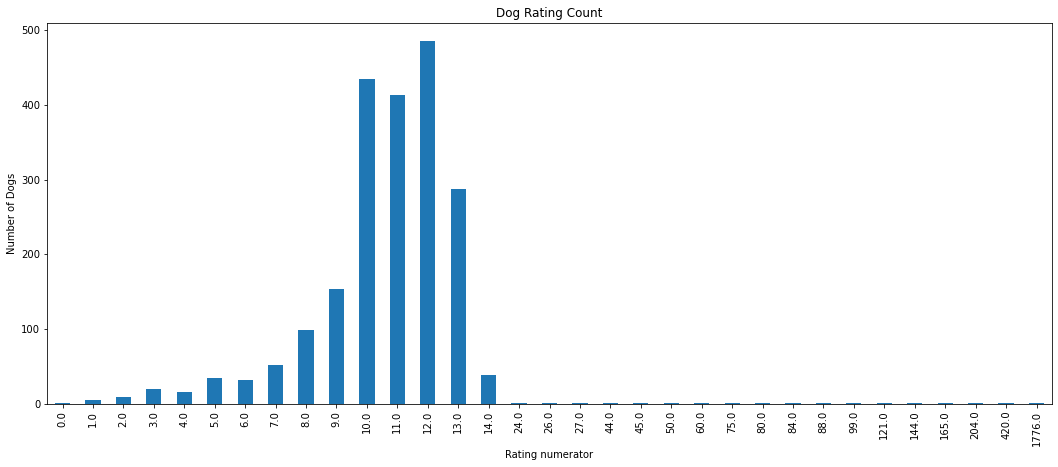

In [61]:
# code to produce a graph of the rating numeratot count.
graph = data_merge.rating_numerator.value_counts().sort_index().plot(kind ='bar', title = 'Dog Rating Count', figsize = (18,7))
graph.set_xlabel("Rating numerator")
graph.set_ylabel("Number of Dogs")
plt.savefig('rating_dist')

12 is the most awarded rating numerator to the dogs.

### Insight 5

Most common name of the dogs

In [62]:
# Code to attain value counts of the different names used.
data_merge.name.value_counts().head(30)

           684
Charlie    11 
Lucy       11 
Oliver     10 
Cooper     10 
Penny      9  
Tucker     9  
Winston    8  
Sadie      8  
Lola       8  
Daisy      7  
Toby       7  
Stanley    6  
Bo         6  
Koda       6  
Oscar      6  
Jax        6  
Bella      6  
Bailey     6  
Bentley    5  
Rusty      5  
Chester    5  
Leo        5  
Scout      5  
Louis      5  
Buddy      5  
Milo       5  
Dave       5  
Duke       4  
Sophie     4  
Name: name, dtype: int64

Text(0.5, 0, 'Name of the Dogs')

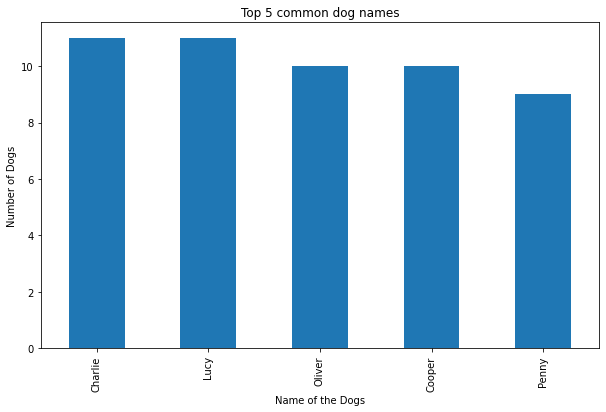

In [63]:
data_merge.name.value_counts()[1:6].plot(kind='bar', 
                                         figsize=(10,6), title='Top 5 common dog names').set_ylabel("Number of Dogs")
plt.xlabel('Name of the Dogs')

#### Lucy and Charlie are the most common names for the dogs.

### Insight 6

Analysis of the most used device for  twitter.

Text(0.5, -66.875, 'Source')

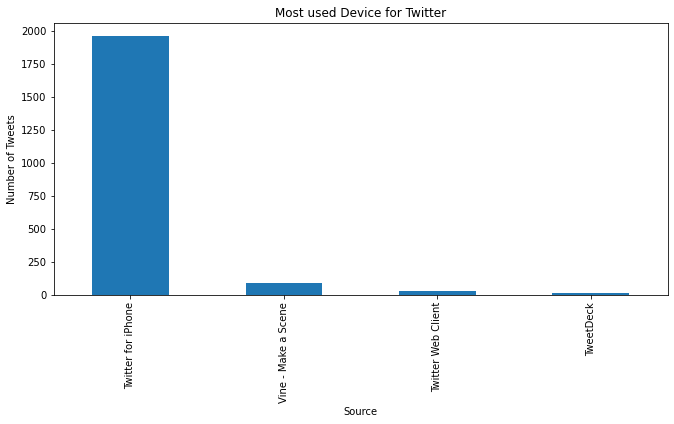

In [64]:
data_merge['source'].value_counts().plot(kind ='bar', figsize=(11,5), 
                                         title='Most used Device for Twitter').set_ylabel("Number of Tweets")
plt.savefig('twiiter_device')
plt.xlabel('Source')

#### Twitter for iphone is the most common used device for the tweets of the dogs archive data.

### Visualisation 1

Plot a scatter diagram that shows the relationship between the retweets and favorites count.

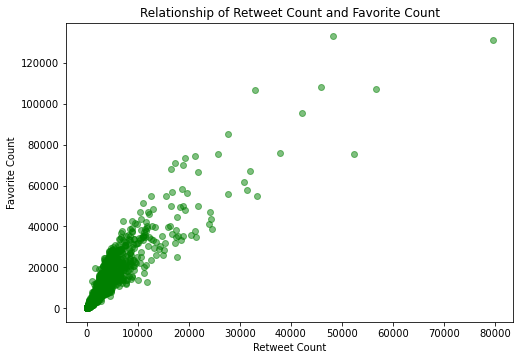

In [65]:
#Let's plot a scatter diagram shows the relationship between the retweets & favorites count.
plt.rcParams["figure.figsize"] = (8,5.5)
plt.scatter(data=data_merge, x='retweet_count', y='favorite_count', alpha = 0.5, color='green');

#Titles and labels
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')
plt.title('Relationship of Retweet Count and Favorite Count')
plt.show()

### Visualisation 2

Plot bar graphs for all the numeric data in the dataset and plot a seaborn pairplot for all the numeric to analyse the relationship between the numeric varibales.

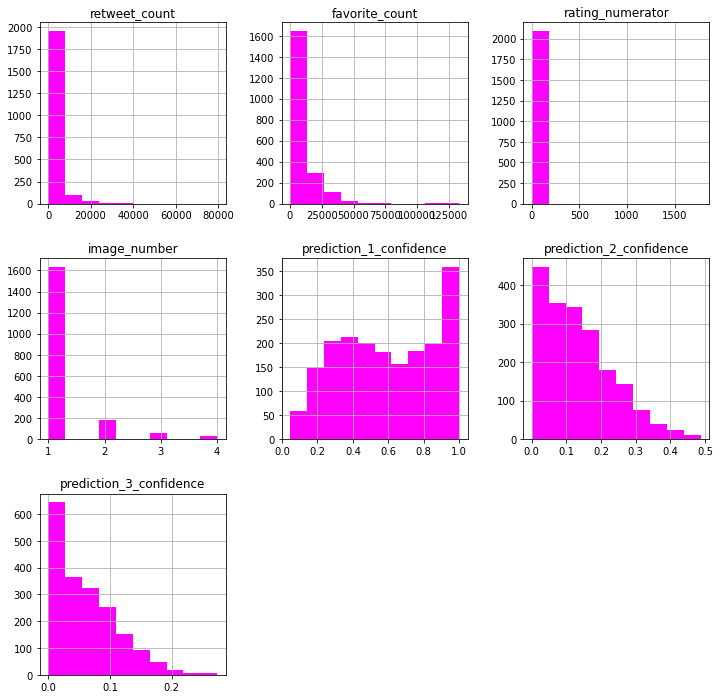

In [66]:
# Code to plot histograms for the different numeric variables.
data_merge_numeric = data_merge[['retweet_count', 'favorite_count', 'rating_numerator', 'image_number',
                                 'prediction_1_confidence','prediction_2_confidence',  'prediction_3_confidence']]
data_merge_numeric.hist(figsize = (12,12), color = 'magenta');

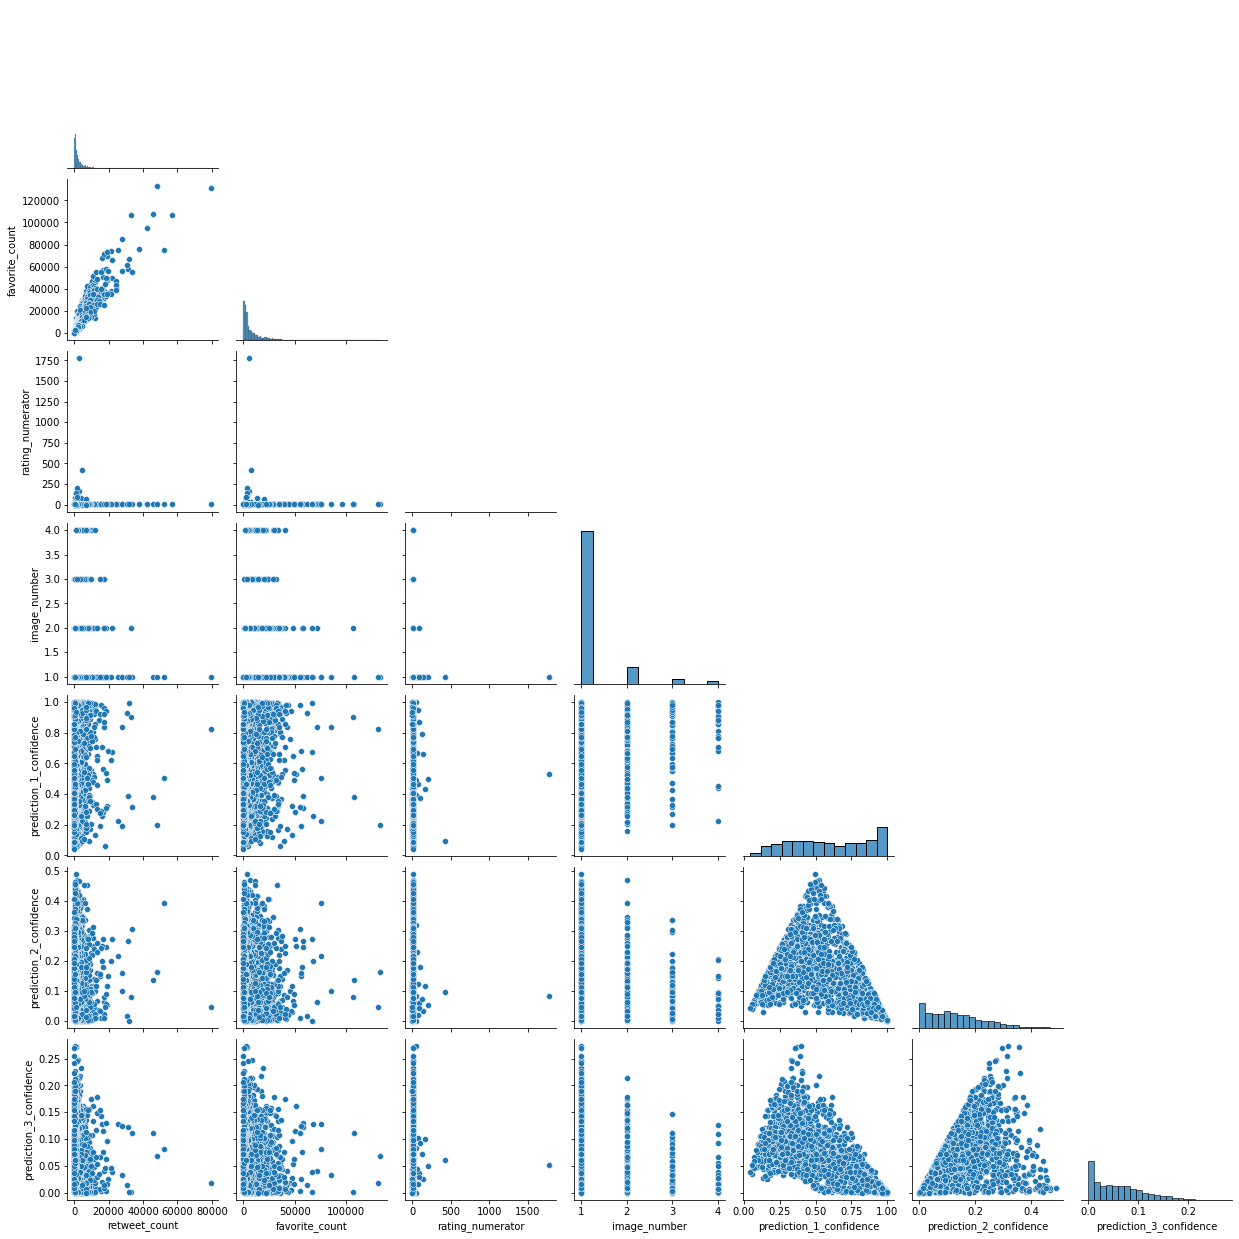

In [67]:
# code to plot a correlation plot of the different numeric variables.
sns.pairplot(data_merge_numeric, diag_kind="hist", corner = True,)